In [2]:
import pandas as pd

data = pd.read_csv('data_without_null')
data.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


In [6]:
KR = data.loc[(data['SUBDIVISION'] == 'COASTAL KARNATAKA') | (data['SUBDIVISION'] == 'SOUTH INTERIOR KARNATAKA') | (data['SUBDIVISION'] == 'NORTH INTERIOR KARNATAKA')]
KR.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
3528,COASTAL KARNATAKA,1901,1.8,0.6,10.7,52.4,81.6,960.9,991.2,606.4,108.0,120.5,104.9,17.8,3056.9,2.4,144.7,2666.6,243.3
3529,COASTAL KARNATAKA,1902,3.2,0.3,4.9,10.2,54.6,698.4,1401.6,454.2,708.4,180.4,50.8,132.2,3699.2,3.5,69.7,3262.6,363.5
3530,COASTAL KARNATAKA,1903,0.7,0.0,0.0,4.1,202.8,536.5,1405.5,593.8,304.4,185.0,79.3,5.3,3317.4,0.7,206.9,2840.1,269.6
3531,COASTAL KARNATAKA,1904,2.4,0.0,4.8,23.7,93.2,1108.2,1070.0,465.6,245.3,127.2,0.7,0.0,3141.1,2.4,121.7,2889.1,127.9
3532,COASTAL KARNATAKA,1905,0.0,0.2,0.0,6.4,83.1,767.3,777.3,586.9,172.9,222.2,36.1,0.0,2652.3,0.2,89.4,2304.3,258.4


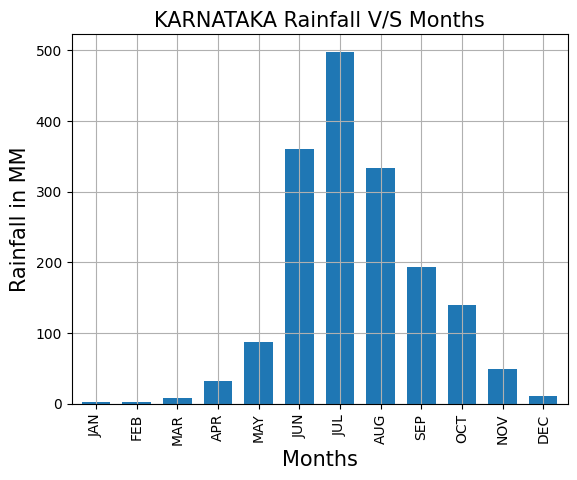

In [7]:
import matplotlib.pyplot as plt

KR[['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']].mean().plot(kind="bar",width=0.7,linewidth=3)
plt.title("KARNATAKA Rainfall V/S Months",size=15)
plt.xlabel("Months",size=15)
plt.ylabel("Rainfall in MM",size=15)
plt.grid(axis="both",linestyle="-")
plt.show()

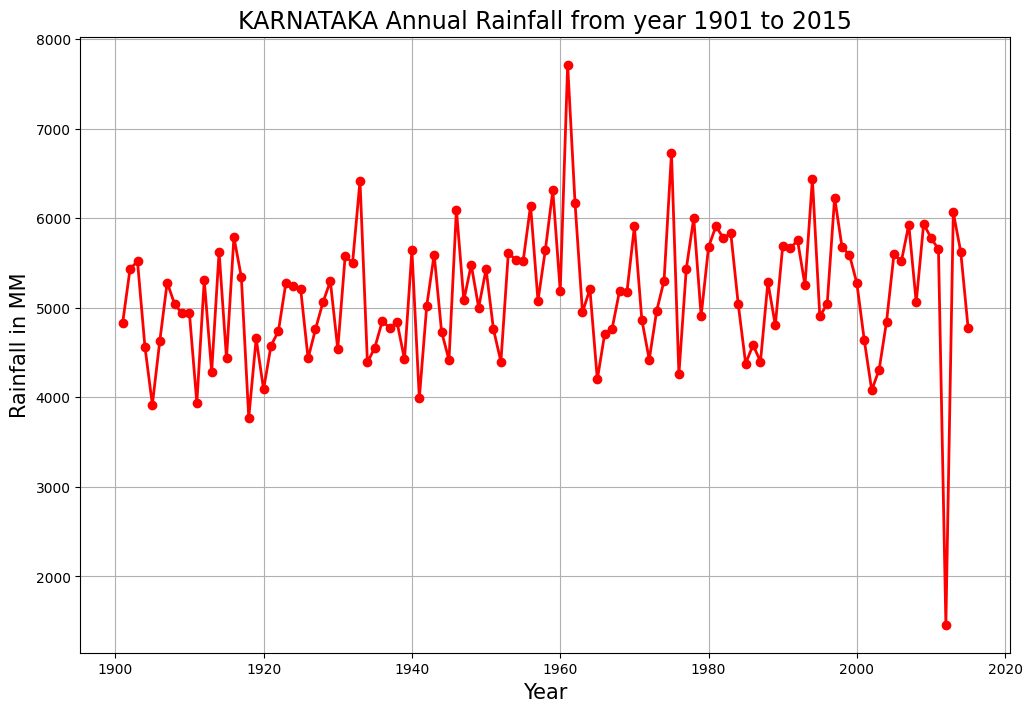

In [8]:
KR.groupby("YEAR").sum()['ANNUAL'].plot(color='r',marker="o",linestyle='-',linewidth=2,figsize=(12,8))
plt.title("KARNATAKA Annual Rainfall from year 1901 to 2015",size=17)
plt.xlabel("Year",size=15)
plt.ylabel("Rainfall in MM",size=15)
plt.grid()
plt.show()

In [9]:
group = data.groupby('SUBDIVISION')[['YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']]
data = pd.concat([group.get_group('COASTAL KARNATAKA'), group.get_group('SOUTH INTERIOR KARNATAKA'),group.get_group('NORTH INTERIOR KARNATAKA')])
data.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
3528,1901,1.8,0.6,10.7,52.4,81.6,960.9,991.2,606.4,108.0,120.5,104.9,17.8
3529,1902,3.2,0.3,4.9,10.2,54.6,698.4,1401.6,454.2,708.4,180.4,50.8,132.2
3530,1903,0.7,0.0,0.0,4.1,202.8,536.5,1405.5,593.8,304.4,185.0,79.3,5.3
3531,1904,2.4,0.0,4.8,23.7,93.2,1108.2,1070.0,465.6,245.3,127.2,0.7,0.0
3532,1905,0.0,0.2,0.0,6.4,83.1,767.3,777.3,586.9,172.9,222.2,36.1,0.0


In [10]:
df = data.melt(['YEAR']).reset_index()
df.head()

,index,YEAR,variable,value
0,0,1901,JAN,1.8
1,1,1902,JAN,3.2
2,2,1903,JAN,0.7
3,3,1904,JAN,2.4
4,4,1905,JAN,0.0


In [11]:
df = df[['YEAR','variable','value']].reset_index().sort_values(by=['YEAR','index'])
df.head()

,index,YEAR,variable,value
0,0,1901,JAN,1.8
114,114,1901,JAN,4.9
229,229,1901,JAN,3.5
344,344,1901,FEB,0.6
458,458,1901,FEB,31.8


In [12]:
df.columns=['Index','Year','Month','Avg Rainfall']
df.head()

,Index,Year,Month,Avg Rainfall
0,0,1901,JAN,1.8
114,114,1901,JAN,4.9
229,229,1901,JAN,3.5
344,344,1901,FEB,0.6
458,458,1901,FEB,31.8


In [13]:
monthMap = {'JAN':1,'FEB':2,'MAR':3,'APR':4,'MAY':5,'JUN':6,'JUL':7,'AUG':8,'SEP':9,'OCT':10,'NOV':11,'DEC':12}
df['Month'] = df['Month'].map(monthMap)
df.head(10)

,Index,Year,Month,Avg Rainfall
0,0,1901,1,1.8
114,114,1901,1,4.9
229,229,1901,1,3.5
344,344,1901,2,0.6
458,458,1901,2,31.8
573,573,1901,2,18.8
688,688,1901,3,10.7
802,802,1901,3,3.0
917,917,1901,3,7.1
1032,1032,1901,4,52.4


In [14]:
df.drop(columns="Index",inplace=True)

In [15]:
df.head()

,Year,Month,Avg Rainfall
0,1901,1,1.8
114,1901,1,4.9
229,1901,1,3.5
344,1901,2,0.6
458,1901,2,31.8


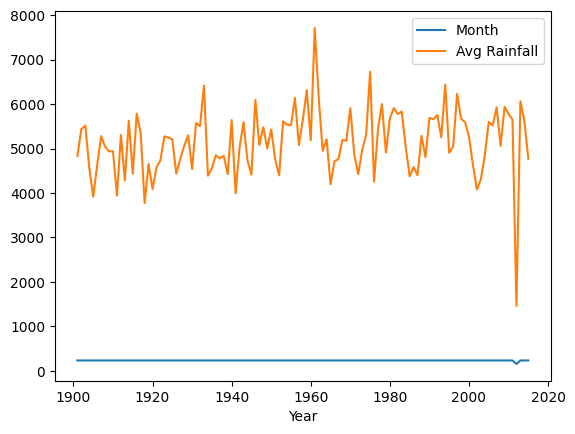

In [16]:
df.groupby("Year").sum().plot()
plt.show()

C:\Users\Acer\AppData\Local\Temp\ipykernel_16624\4153292416.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Avg Rainfall'])


<Axes: ylabel='Avg Rainfall'>

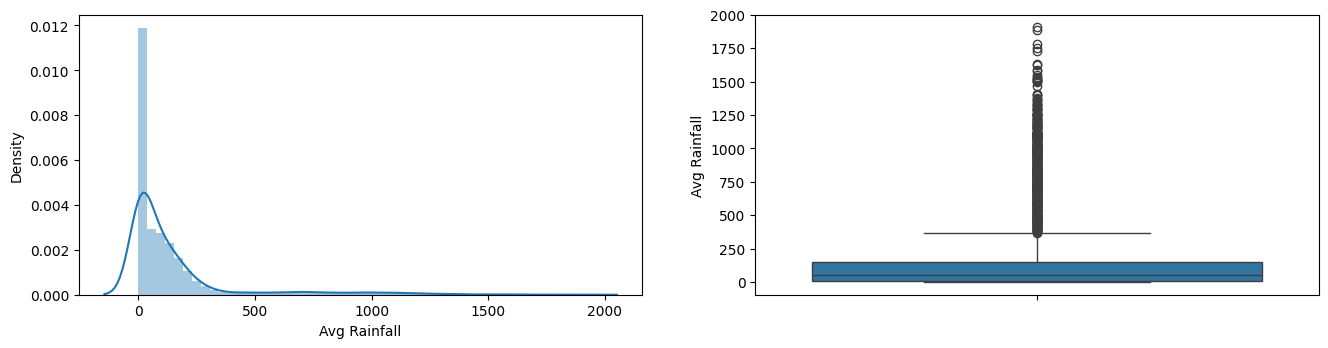

In [17]:
import matplotlib.pyplot as plt 
import seaborn as sns

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['Avg Rainfall'])
plt.subplot(2,2,2)
sns.boxplot(df['Avg Rainfall'])

In [19]:
percentile25 = df['Avg Rainfall'].quantile(0.25)
percentile75 = df['Avg Rainfall'].quantile(0.75)
iqr = percentile75 - percentile25

upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

df[df['Avg Rainfall'] > upper_limit]
df[df['Avg Rainfall'] < lower_limit]

new_df = df[df['Avg Rainfall'] < upper_limit]
new_df.shape

(3749, 3)

C:\Users\Acer\AppData\Local\Temp\ipykernel_16624\118003576.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Avg Rainfall'])
C:\Users\Acer\AppData\Local\Temp\ipykernel_16624\118003576.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['Avg Rainfall'])


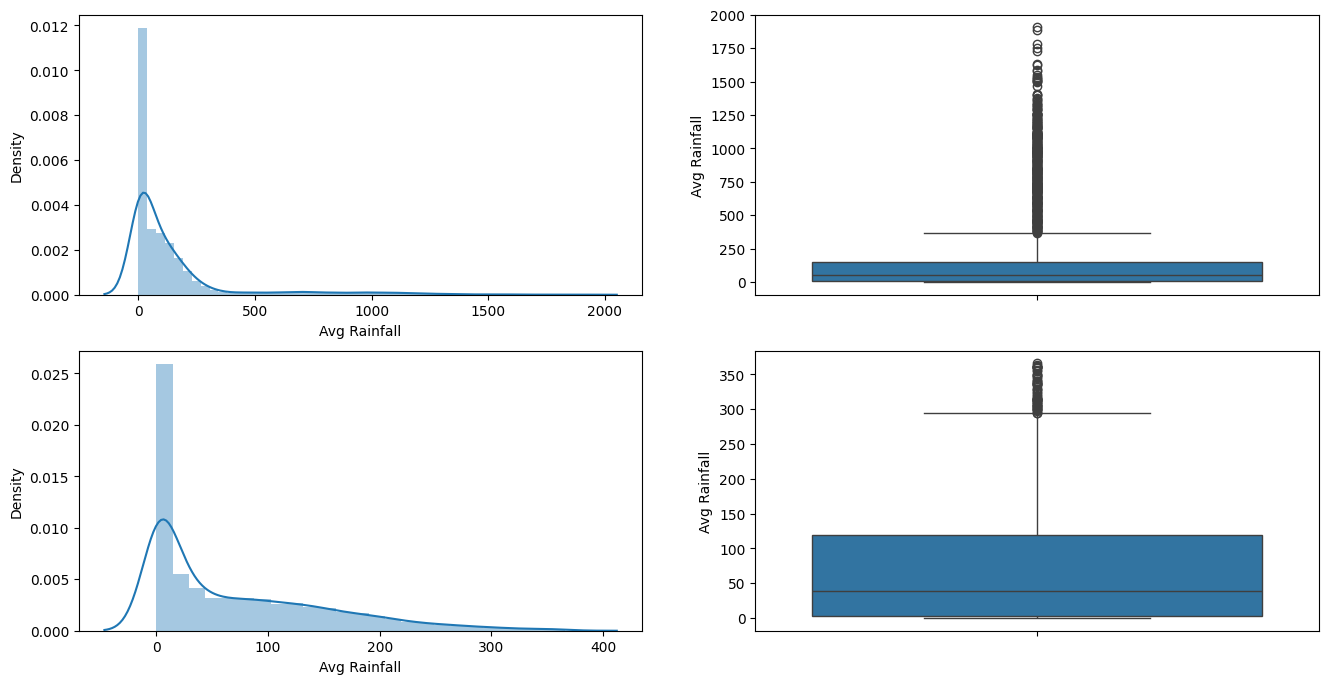

In [20]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['Avg Rainfall'])
plt.subplot(2,2,2)
sns.boxplot(df['Avg Rainfall'])

plt.subplot(2,2,3)
sns.distplot(new_df['Avg Rainfall'])
plt.subplot(2,2,4)
sns.boxplot(new_df['Avg Rainfall'])
plt.show()

In [21]:
percentile25 = new_df['Avg Rainfall'].quantile(0.25)
percentile75 = new_df['Avg Rainfall'].quantile(0.75)
iqr = percentile75 - percentile25

upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

new_df[new_df['Avg Rainfall'] > upper_limit]
new_df[new_df['Avg Rainfall'] < lower_limit]

new_df2 = new_df[new_df['Avg Rainfall'] < upper_limit]
new_df2.shape

(3689, 3)

C:\Users\Acer\AppData\Local\Temp\ipykernel_16624\2775748692.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['Avg Rainfall'])
C:\Users\Acer\AppData\Local\Temp\ipykernel_16624\2775748692.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df2['Avg Rainfall'])


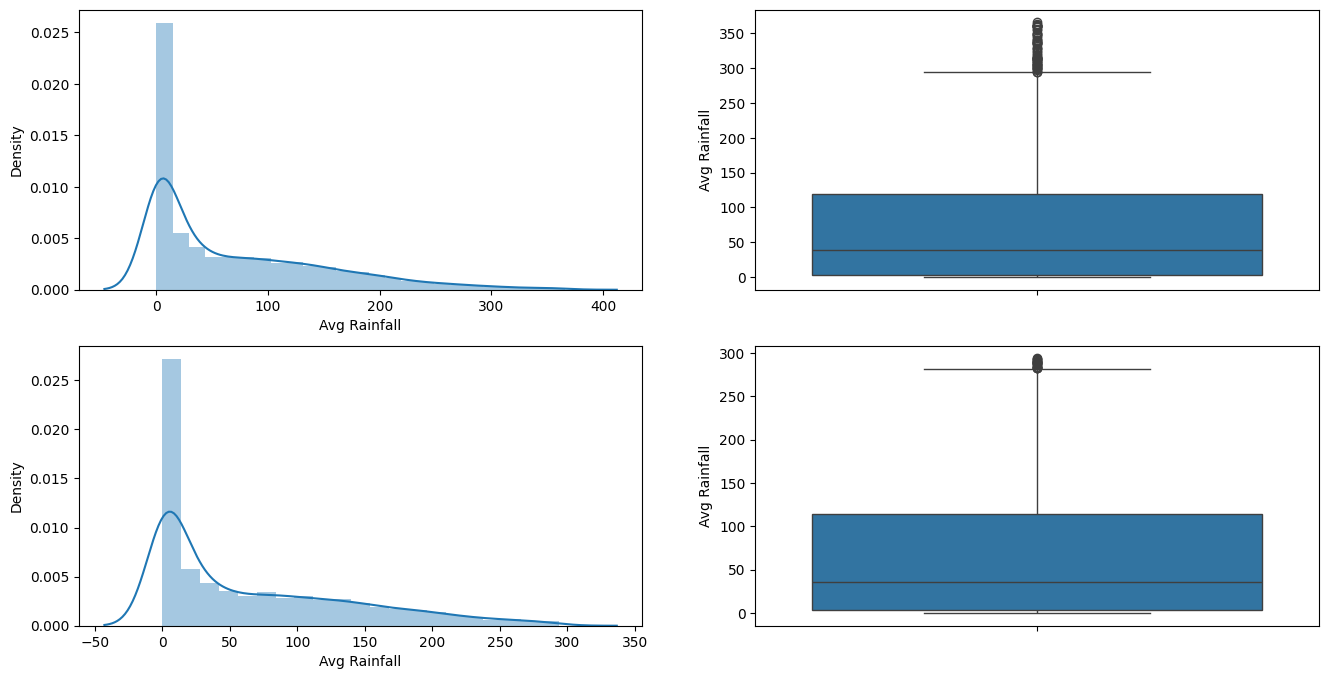

In [22]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(new_df['Avg Rainfall'])
plt.subplot(2,2,2)
sns.boxplot(new_df['Avg Rainfall'])

plt.subplot(2,2,3)
sns.distplot(new_df2['Avg Rainfall'])
plt.subplot(2,2,4)
sns.boxplot(new_df2['Avg Rainfall'])
plt.show()

In [23]:
percentile25 = new_df2['Avg Rainfall'].quantile(0.25)
percentile75 = new_df2['Avg Rainfall'].quantile(0.75)
iqr = percentile75 - percentile25

upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

new_df2[new_df2['Avg Rainfall'] > upper_limit]
new_df2[new_df2['Avg Rainfall'] < lower_limit]

new_df3 = new_df2[new_df2['Avg Rainfall'] < upper_limit]
new_df3.shape

(3669, 3)

C:\Users\Acer\AppData\Local\Temp\ipykernel_16624\1473949475.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df2['Avg Rainfall'])
C:\Users\Acer\AppData\Local\Temp\ipykernel_16624\1473949475.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df3['Avg Rainfall'])


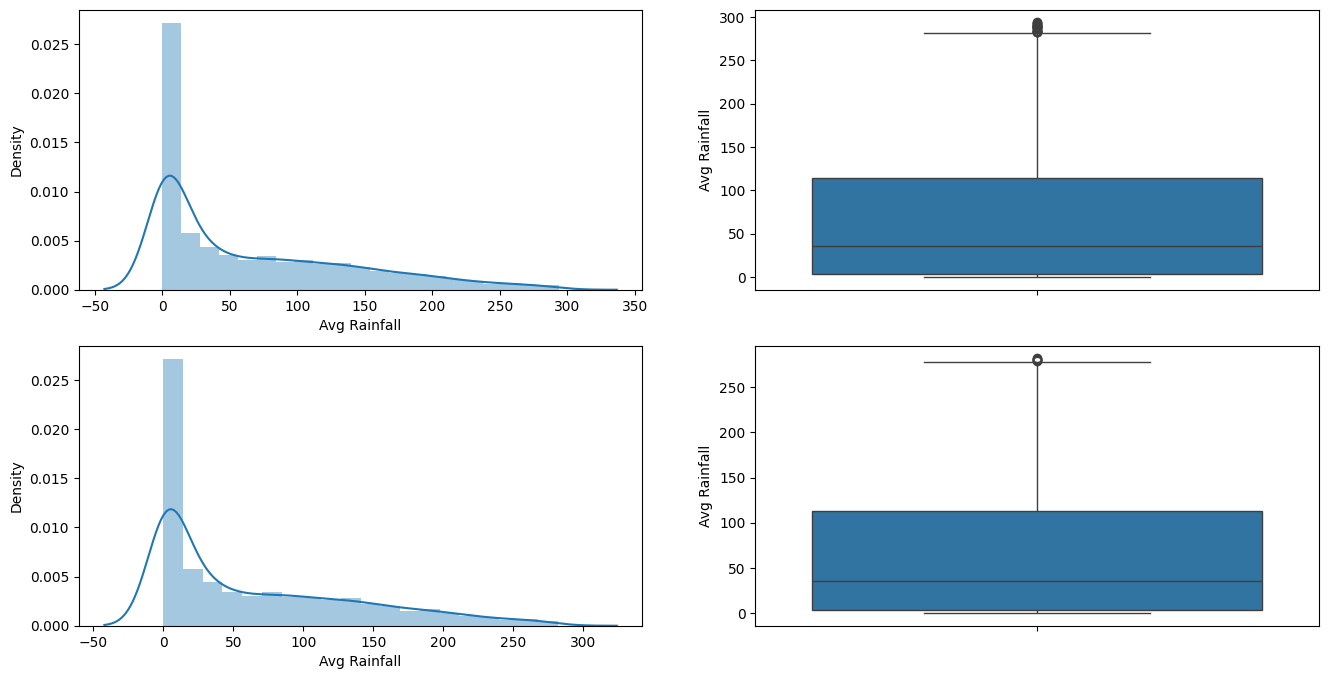

In [24]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(new_df2['Avg Rainfall'])
plt.subplot(2,2,2)
sns.boxplot(new_df2['Avg Rainfall'])

plt.subplot(2,2,3)
sns.distplot(new_df3['Avg Rainfall'])
plt.subplot(2,2,4)
sns.boxplot(new_df3['Avg Rainfall'])
plt.show()

In [25]:
percentile25 = new_df3['Avg Rainfall'].quantile(0.25)
percentile75 = new_df3['Avg Rainfall'].quantile(0.75)
iqr = percentile75 - percentile25

upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

new_df3[new_df3['Avg Rainfall'] > upper_limit]
new_df3[new_df3['Avg Rainfall'] < lower_limit]

new_df4 = new_df3[new_df3['Avg Rainfall'] < upper_limit]
new_df4.shape

(3663, 3)

C:\Users\Acer\AppData\Local\Temp\ipykernel_16624\4083361439.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df3['Avg Rainfall'])
C:\Users\Acer\AppData\Local\Temp\ipykernel_16624\4083361439.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df4['Avg Rainfall'])


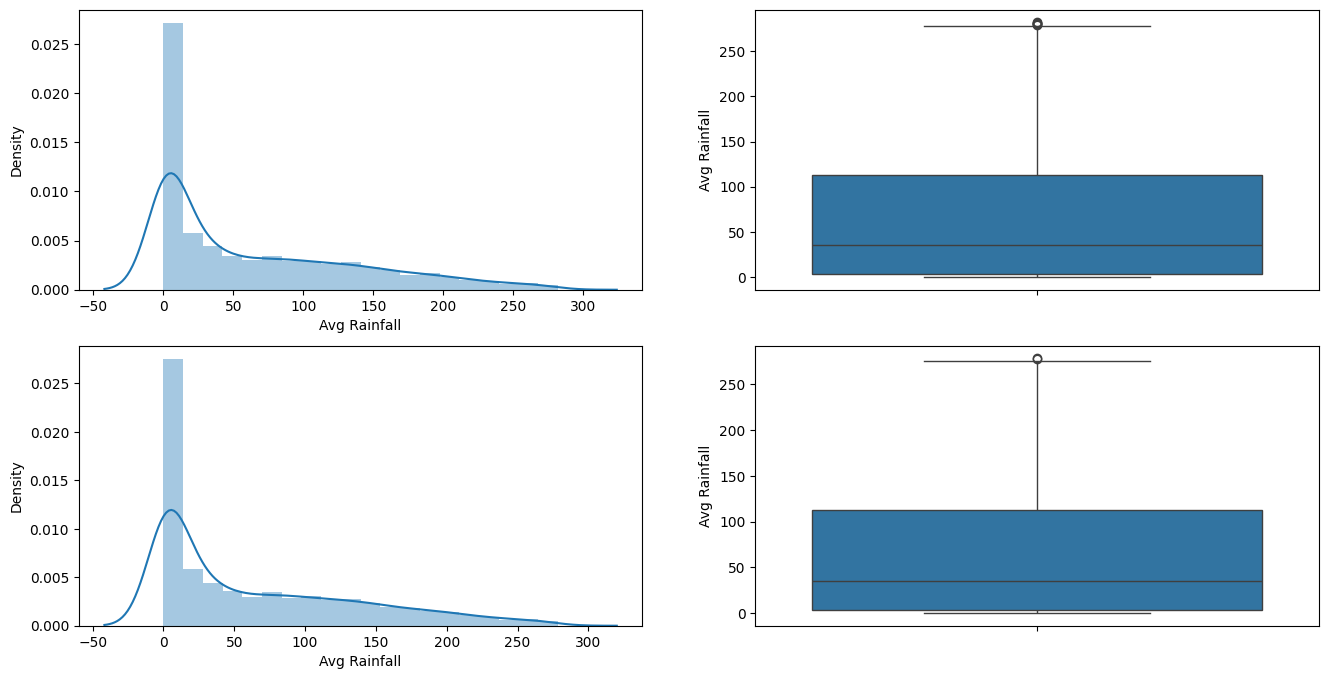

In [26]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(new_df3['Avg Rainfall'])
plt.subplot(2,2,2)
sns.boxplot(new_df3['Avg Rainfall'])

plt.subplot(2,2,3)
sns.distplot(new_df4['Avg Rainfall'])
plt.subplot(2,2,4)
sns.boxplot(new_df4['Avg Rainfall'])
plt.show()

In [27]:
percentile25 = new_df4['Avg Rainfall'].quantile(0.25)
percentile75 = new_df4['Avg Rainfall'].quantile(0.75)
iqr = percentile75 - percentile25

upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

new_df4[new_df4['Avg Rainfall'] > upper_limit]
new_df4[new_df4['Avg Rainfall'] < lower_limit]

new_df5 = new_df4[new_df4['Avg Rainfall'] < upper_limit]
new_df5.shape

(3661, 3)

C:\Users\Acer\AppData\Local\Temp\ipykernel_16624\3776872767.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df4['Avg Rainfall'])
C:\Users\Acer\AppData\Local\Temp\ipykernel_16624\3776872767.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df5['Avg Rainfall'])


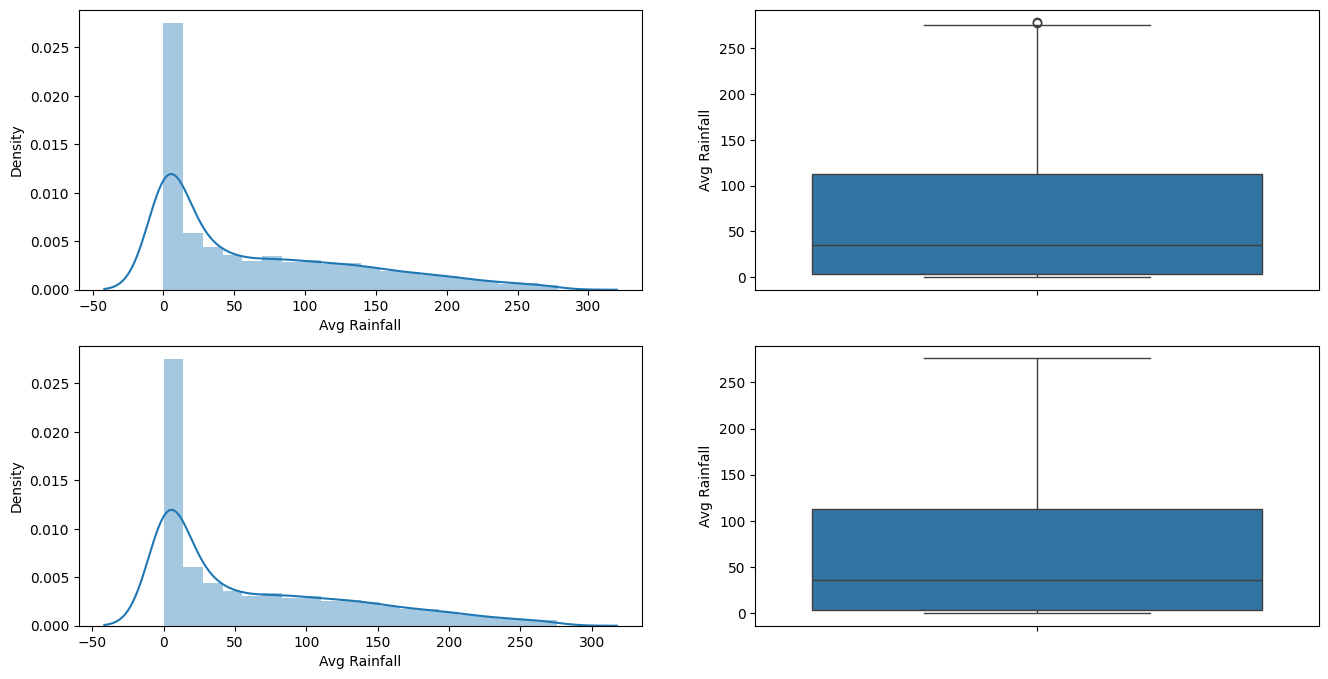

In [28]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(new_df4['Avg Rainfall'])
plt.subplot(2,2,2)
sns.boxplot(new_df4['Avg Rainfall'])

plt.subplot(2,2,3)
sns.distplot(new_df5['Avg Rainfall'])
plt.subplot(2,2,4)
sns.boxplot(new_df5['Avg Rainfall'])
plt.show()

In [29]:
import numpy as np
from sklearn.model_selection import train_test_split

X = np.asanyarray(new_df5[['Year','Month']]).astype('int')
Y = np.asanyarray(new_df5['Avg Rainfall']).astype('int')

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print(X.shape)
print(Y.shape)

(3661, 2)
(3661,)


In [33]:
new_df5.head(10)

,Year,Month,Avg Rainfall
0,1901,1,1.8
114,1901,1,4.9
229,1901,1,3.5
344,1901,2,0.6
458,1901,2,31.8
573,1901,2,18.8
688,1901,3,10.7
802,1901,3,3.0
917,1901,3,7.1
1032,1901,4,52.4


In [32]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

knn_model = KNeighborsRegressor(n_neighbors=5) 
knn_model.fit(X_train, Y_train)

y_train_predict = knn_model.predict(X_train)
y_test_predict = knn_model.predict(X_test)

predicted = knn_model.predict([[1901, 1]])

train_r2_score = r2_score(Y_train, y_train_predict)

test_r2_score = r2_score(Y_test, y_test_predict)

print("R-squared score on training data:", train_r2_score)
print("R-squared score on test data:", test_r2_score)
print("Predicted value : ", predicted)


R-squared score on training data: 0.7714757404964234
R-squared score on test data: 0.6360892589648675
Predicted value :  [5.2]


In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

random_forest_model = RandomForestRegressor(n_estimators=50, random_state=45)
random_forest_model.fit(X_train, Y_train)

y_train_predict = random_forest_model.predict(X_train)
y_test_predict = random_forest_model.predict(X_test)

predicted = random_forest_model.predict([[1901, 1]])

train_r2_score = r2_score(Y_train, y_train_predict)

test_r2_score = r2_score(Y_test, y_test_predict)

print("R-squared score on training data:", train_r2_score)
print("R-squared score on test data:", test_r2_score)
print("Predicted value ", predicted)

R-squared score on training data: 0.8834018374213353
R-squared score on test data: 0.6468024613406012
Predicted value  [4.76766667]


In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

linear_model = LinearRegression()
linear_model.fit(X_train, Y_train)

y_train_predict = linear_model.predict(X_train)
y_test_predict = linear_model.predict(X_test)

predicted = linear_model.predict([[1901, 1]])

train_r2_score = r2_score(Y_train, y_train_predict)
test_r2_score = r2_score(Y_test, y_test_predict)

print("R-squared score on training data:", train_r2_score)
print("R-squared score on test data:", test_r2_score)
print("Predicted value:", predicted)

R-squared score on training data: 0.12340858363384366
R-squared score on test data: 0.1229721664125315
Predicted value: [26.67995967]


In [36]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

decision_tree_model = DecisionTreeRegressor(random_state=45)
decision_tree_model.fit(X_train, Y_train)

y_train_predict = decision_tree_model.predict(X_train)
y_test_predict = decision_tree_model.predict(X_test)

predicted = decision_tree_model.predict([[1901, 1]])

train_r2_score = r2_score(Y_train, y_train_predict)

test_r2_score = r2_score(Y_test, y_test_predict)

print("R-squared score on training data:", train_r2_score)
print("R-squared score on test data:", test_r2_score)
print("Predicted value:", predicted[0])

R-squared score on training data: 0.8958474319616836
R-squared score on test data: 0.5695594772211046
Predicted value: 3.5


In [37]:
import pickle

pickle.dump(decision_tree_model,open('kr_decesion_tree_model.pkl','wb'))

In [38]:
pickel_model = pickle.load(open('kr_decesion_tree_model.pkl','rb'))
pickel_model.predict([[1901, 1]])

array([3.5])